In [2]:
# Impotación de liberiaas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
# File paths
data_path = '../data/covid_data.csv'
data_fr = pd.read_csv(data_path)
data_fr.head(10)

,Country,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20
0,Afghanistan,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,40626 1505,40687 1507,40768 1511,40833 1514,40937 1518,41032 1523,41145 1529,41268 1532,41334 1533,41425 1536
1,Albania,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,18250 465,18556 469,18858 473,19157 477,19445 480,19729 487,20040 493,20315 499,20634 502,20875 509
2,Algeria,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,55357 1888,55630 1897,55880 1907,56143 1914,56419 1922,56706 1931,57026 1941,57332 1949,57651 1956,57942 1964
3,Andorra,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,3811 63,4038 69,4038 69,4038 69,4325 72,4410 72,4517 72,4567 73,4665 75,4756 75
4,Angola,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,8582 260,8829 265,9026 267,9381 268,9644 270,9871 271,10074 275,10269 275,10558 279,10805 284
5,Antigua and Barbuda,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,122 3,122 3,124 3,124 3,124 3,124 3,124 3,124 3,127 3,128 3
6,Argentina,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,1053650 27957,1069368 28338,1081336 28613,1090589 28896,1102301 29301,1116609 29730,1130533 30071,1143800 30442,1157179 30792,1166924 31002
7,Armenia,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,70836 1131,73310 1145,75523 1157,77837 1180,78810 1196,80410 1222,82651 1243,85034 1272,87432 1300,89813 1341
8,Australia,NaN,0 0,0 0,0 0,0 0,4 0,5 0,5 0,6 0,...,27476 905,27495 905,27513 905,27525 905,27539 905,27553 907,27565 907,27579 907,27585 907,27595 907
9,Australia,Australian Capital Territory,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,114 3,114 3,114 3,114 3,114 3,114 3,114 3,114 3,114 3,114 3


In [4]:
#Utilizar función melt para pasar dejar a country y sate como columnas y las fechas y los datos pasar de filas a columnas
data_fr=pd.melt(data_fr, id_vars=['Country', 'State'], var_name='Date', value_name='cases_deaths')

In [5]:
data_fr

,Country,State,Date,cases_deaths
0,Afghanistan,NaN,1/22/20,0 0
1,Albania,NaN,1/22/20,0 0
2,Algeria,NaN,1/22/20,0 0
3,Andorra,NaN,1/22/20,0 0
4,Angola,NaN,1/22/20,0 0
...,...,...,...,...
92295,West Bank and Gaza,NaN,10/31/20,53520 483
92296,Western Sahara,NaN,10/31/20,10 1
92297,Yemen,NaN,10/31/20,2063 599
92298,Zambia,NaN,10/31/20,16432 349


In [6]:
#Separar casos y muertes en columnas diferentes
separated_df = data_fr["cases_deaths"].str.split(expand=True)
separated_df.columns = ['Casos', 'Muertes']
data_fr['Casos']=separated_df['Casos']
data_fr['Muertes']=separated_df['Muertes']
data_fr

,Country,State,Date,cases_deaths,Casos,Muertes
0,Afghanistan,NaN,1/22/20,0 0,0,0
1,Albania,NaN,1/22/20,0 0,0,0
2,Algeria,NaN,1/22/20,0 0,0,0
3,Andorra,NaN,1/22/20,0 0,0,0
4,Angola,NaN,1/22/20,0 0,0,0
...,...,...,...,...,...,...
92295,West Bank and Gaza,NaN,10/31/20,53520 483,53520,483
92296,Western Sahara,NaN,10/31/20,10 1,10,1
92297,Yemen,NaN,10/31/20,2063 599,2063,599
92298,Zambia,NaN,10/31/20,16432 349,16432,349


In [7]:
#Eliminar columna cases_deaths
dataReady=data_fr.drop(['cases_deaths'], axis=1)
dataReady

,Country,State,Date,Casos,Muertes
0,Afghanistan,NaN,1/22/20,0,0
1,Albania,NaN,1/22/20,0,0
2,Algeria,NaN,1/22/20,0,0
3,Andorra,NaN,1/22/20,0,0
4,Angola,NaN,1/22/20,0,0
...,...,...,...,...,...
92295,West Bank and Gaza,NaN,10/31/20,53520,483
92296,Western Sahara,NaN,10/31/20,10,1
92297,Yemen,NaN,10/31/20,2063,599
92298,Zambia,NaN,10/31/20,16432,349


In [57]:
dataReady.dtypes

Country    object
State      object
Date       object
Casos      object
Muertes    object
dtype: object

In [25]:
dataReady.loc[108][0]

'Ecuador'

In [27]:
dataReady.loc[205][0]

'Peru'

In [28]:
dataReady.loc[92][0]

'Colombia'

In [8]:
#Conversión de Object a diferentes tipos
dataReady['Casos']= dataReady['Casos'].astype('int')
dataReady['Muertes']= dataReady['Muertes'].astype('int')
dataReady['Date']=pd.to_datetime(dataReady['Date'])

In [63]:
dataReady.dtypes

Country            object
State              object
Date       datetime64[ns]
Casos               int32
Muertes             int32
dtype: object

In [12]:
dataReady.head(100)


,Country,State,Date,Casos,Muertes
0,Afghanistan,NaN,2020-01-22,0,0
1,Albania,NaN,2020-01-22,0,0
2,Algeria,NaN,2020-01-22,0,0
3,Andorra,NaN,2020-01-22,0,0
4,Angola,NaN,2020-01-22,0,0
...,...,...,...,...,...
95,Congo (Kinshasa),NaN,2020-01-22,0,0
96,Costa Rica,NaN,2020-01-22,0,0
97,Cote d'Ivoire,NaN,2020-01-22,0,0
98,Croatia,NaN,2020-01-22,0,0


In [135]:
dataReady.iloc[1:,4]  

1          0
2          0
3          0
4          0
5          0
        ... 
92295    483
92296      1
92297    599
92298    349
92299    243
Name: Muertes, Length: 92299, dtype: int32

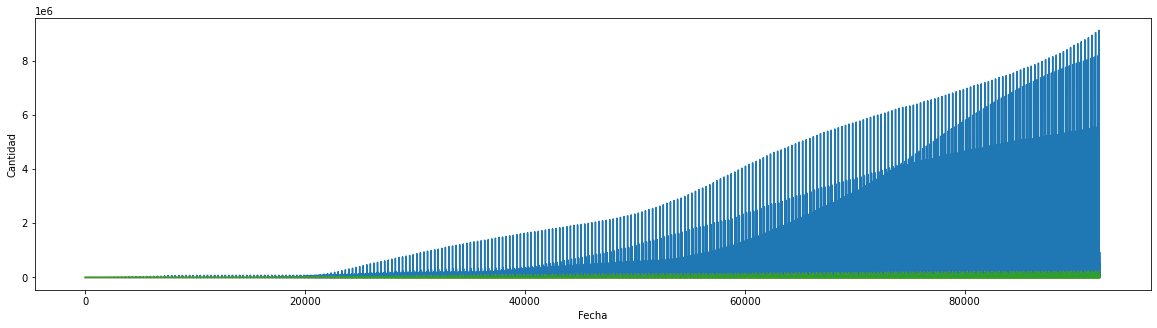

In [140]:
fig = plt.figure(figsize = (20,5))

lista1 = dataReady.iloc[1:,3]   # Declara lista1 los casos de covid
plt.plot(lista1, label="Casos")   # Dibuja el gráfico
plt.xlabel("Fecha")   # Inserta el título del eje X
plt.ylabel("Cantidad")   # Inserta el título del eje Y
#plt.ioff()   # Desactiva modo interactivo de dibujo
lista2 = dataReady.iloc[1:,4]    # Declara lista2 declara muertes por covid
plt.plot(lista2, label="Muertes")   # No dibuja datos de lista2
#plt.ion()   # Activa modo interactivo de dibujo
plt.plot(lista2)   # Dibuja datos de lista2 sin borrar datos de lista1

In [17]:
df = pd.DataFrame(dataReady)
df

,Country,State,Date,Casos,Muertes
0,Afghanistan,NaN,2020-01-22,0,0
1,Albania,NaN,2020-01-22,0,0
2,Algeria,NaN,2020-01-22,0,0
3,Andorra,NaN,2020-01-22,0,0
4,Angola,NaN,2020-01-22,0,0
...,...,...,...,...,...
92295,West Bank and Gaza,NaN,2020-10-31,53520,483
92296,Western Sahara,NaN,2020-10-31,10,1
92297,Yemen,NaN,2020-10-31,2063,599
92298,Zambia,NaN,2020-10-31,16432,349


In [45]:
#Filtrar datos por fecha especifica
df_mask=df['Date']=='2020-03-22'
df_mask
positions = np.flatnonzero(df_mask)
filtered_df=df.iloc[positions]
x_values=filtered_df.iloc[1:,0]

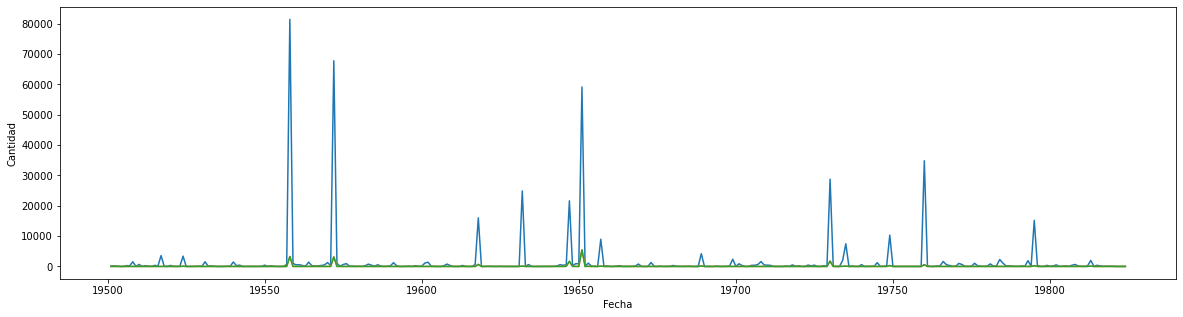

In [49]:
fig = plt.figure(figsize = (20,5))

lista1 = filtered_df.iloc[1:,3]   # Declara lista1 los casos de covid
plt.plot(lista1, label="Casos")   # Dibuja el gráfico
#plt.set_xticks(x_values) 
plt.xlabel("Fecha")   # Inserta el título del eje X
plt.ylabel("Cantidad")   # Inserta el título del eje Y
#plt.ioff()   # Desactiva modo interactivo de dibujo
lista2 = filtered_df.iloc[1:,4]   # Declara lista2 declara muertes por covid
plt.plot(lista2, label="Muertes")   # No dibuja datos de lista2
#plt.ion()   # Activa modo interactivo de dibujo
plt.plot(lista2)


<ipython-input-68-dcec2045240e>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()                   #Axis


Text(0, 0.5, 'Volumen de casos')

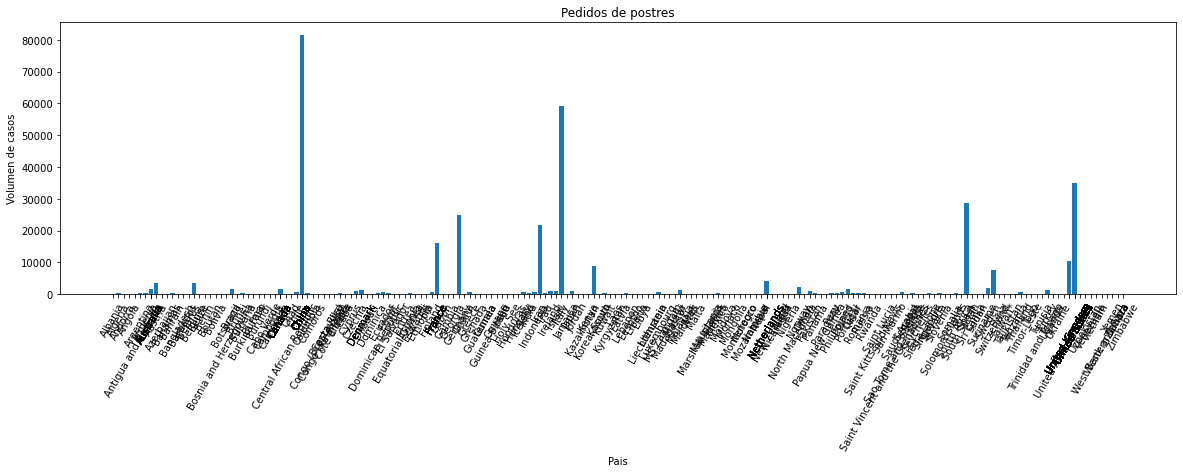

In [68]:
x_values = filtered_df.iloc[1:,0]
y_values = filtered_df.iloc[1:,3].tolist()

plt.figure(figsize = (20,5))    #Figura. Puede incluirse el tamaño con figsize
plt.bar(x_values, y_values)          #El gráfico
plt.title('Pedidos de postres')      #El título
ax = plt.subplot()                   #Axis
ax.set_xticks(x_values)             #Eje x
ax.set_xticklabels(x_values, rotation=60)
ax.set_xticklabels(x_values)        #Etiquetas del eje x
ax.set_xlabel('Pais')  #Nombre del eje x
ax.set_ylabel('Volumen de casos')  #Nombre del eje y

Text(0, 0.5, 'Volumen de peticiones')

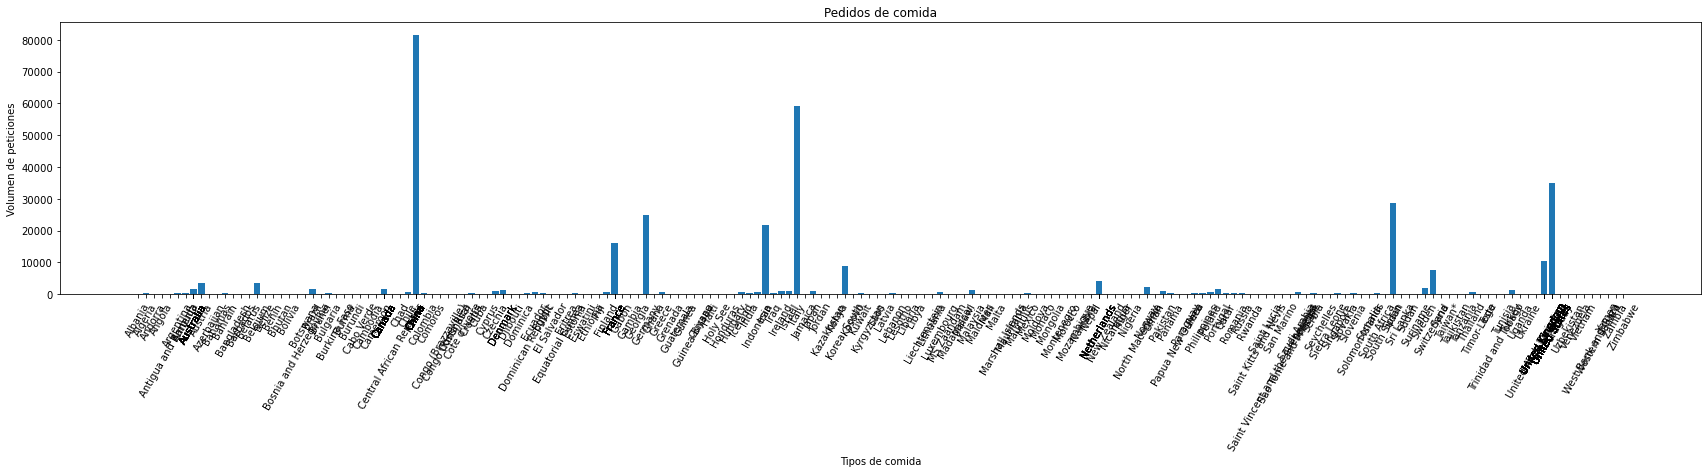

In [63]:
plt.figure(figsize = (100,5))                                #Figura 
x_values1 = filtered_df.iloc[1:,0]
y_values1 = filtered_df.iloc[1:,3]
ax = plt.subplot(1, 3, 1)                   #Axis
plt.bar(x_values1, y_values1)               #El gráfico
plt.title('Pedidos de comida')              #El título
ax.set_xticks(x_values1)                    #Eje x
ax.set_xticklabels(x_values1, rotation=60)  #Etiquetas del eje x
ax.set_xlabel('Tipos de comida')            #Nombre del eje x
ax.set_ylabel('Volumen de peticiones')      #Nombre del eje y

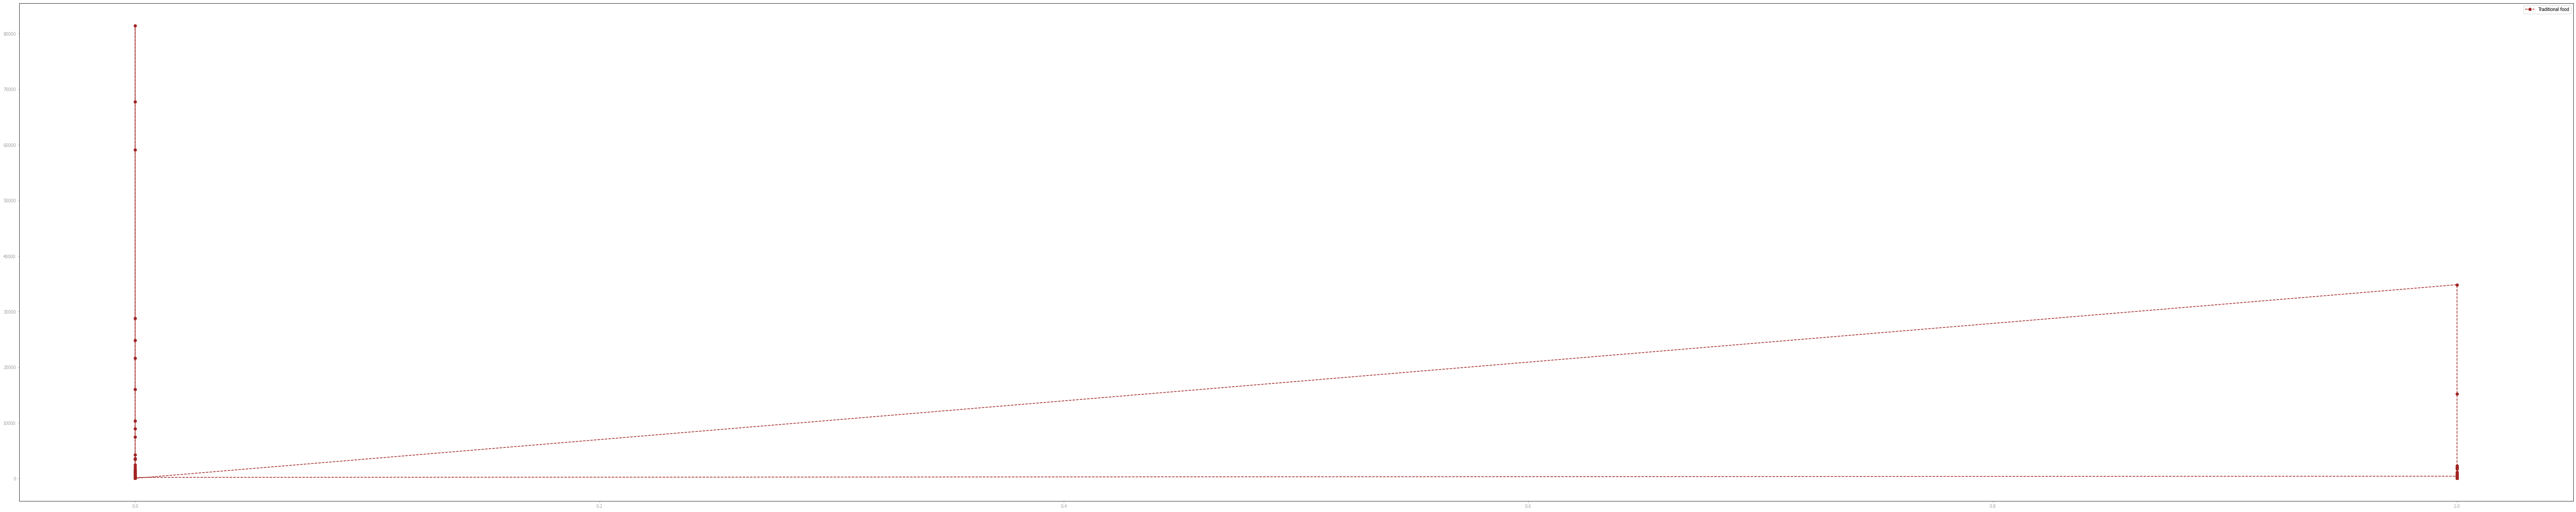

In [103]:
plt.figure(figsize = (100,20)) 
plt.plot(filtered_df.iloc[1:,0]=='United States', filtered_df.iloc[1:,3], color='#a12424', linestyle='--', marker='o')
plt.legend(['Traditional food', 'Western food'], loc=1)
for i, txt in enumerate(y_values2):
    ax.annotate(txt, (filtered_df.iloc[i:,3], filtered_df.iloc[i:,0]))